In [2]:
# 이번시간에는 데이터 기반으로 의사결정하는 것을 해보겠습니다.
# 이번에 선택한 주제는 '푸시' 를 언제 해야하는지 입니다

# '데이터 기반' 이라 해서 뭔가 fancy 한 방법을 사용하는 건 아닙니다.
# 단순히 뭔가 결정하고 의사 결정하기 전에 
# '감'으로 하는 것이 아니라,  한번이라도 데이터를 '파악' 한 다음에  하자는 겁니다.
# 데이터를 파악하면 현상태를 알기 때문에  언제가 최적일지 그 '확률'을 높일수 있는 겁니다
# 같이 해보도록 하죠


### 학습목표
1. 푸쉬 노티피케이션(push notification) 타임 의사 결정 하기

In [3]:
import numpy as np
import pandas as pd
# seaborn
import seaborn as sns
COLORS = sns.color_palette()

%matplotlib inline

In [4]:
def plot_bar(df, xlabel, ylabel, title, figsize=(20, 10), color=COLORS[-1], rotation=45):
    plot = df.plot(kind='bar', color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=10)
    plot.set_ylabel(ylabel, fontsize=10)
    plot.set_title(title, fontsize=12)
    plot.set_xticklabels(labels=df.index, rotation=rotation)

In [5]:
dtypes = {
    'UnitPrice': np.float32,
    'CustomerID': np.int32,
    'Quantity': np.int32
}
retail = pd.read_csv('../Data/OnlineRetailClean.csv', dtype=dtypes)
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [7]:
# 간단하게 회의 내용을 정리 해보았습니다.

# 요즘은 많은 기업들이 '데이터기반'으로 움직이기 때문에,  아직까지도 이런(?) 기업은 없을 것이라 믿습니다.
# 사실 과거 대부분의 회의가 자기 경험. 생각 중심으로만 공유하다가 끝남. (결정도 안난다)
# 한명이라도 데이터를 '확인' 한다면 반박의 여지가 사라지는 겁니다.
# 데이터는 팩트 니까.   그곳에서 답을 찾는 겁니다.

# - 고객은 언제 주문을 많이 하는가?
# - 어느 시간대에 주문을 많이 하는가?

#### 쿠폰 발송을 할때, push를 언제 보내는게 좋을까?
 - 고객에게 쿠폰 발송을 한다고 기획하고, 회의를 한다고 가정해보겠습니다. 
  - A: 쿠폰을 언제보내는게 좋을까요?
  - B: 아침에 출퇴근 시간에 보내는게 좋을까요?
  - C: 점심 먹고 졸린데 그때 보내보죠?
  - D: 흠 자기전에 스마트폰 많이 하던데 그때는 어떨까요?
  - A: 그러면 평균 시간을 내볼까요?
  - K: 아 **데이터**를 확인해보는게 맞지 않을까요? 언제 고객이 주로 주문을 하는지? 


 - 위에서 처럼 실제로 회의를 하다보면 의사결정이 본인/주변의 경험에 의해서 이뤄지는 것을 많이 볼 수 있습니다. 
 - 주문이 이뤄지는 시간을 고려하지 않고 막무가내로 보낸다면 아무 의미가 없고, 추후 같은 이벤트 발생시에도 판단 근거가 없게 됨
 - 현상태에서는 가장 많이 주문이 일어나는 시점에서 하는 것이 가장 직관적인 판단
   - 1. 데이터로 파악
   - 2. 가설 제시
   - 3. 가설 검증
   - 4. 1-3 반복
 - 시간(hour, minute)과 주로 관련되기 때문에 역시 InvoiceDate가 중요한 feature
   

In [9]:
# 각 시간별로 얼마나 많은 주문들이 있는지 알아보자.

# 지난번에 주문때 했었죠.

In [12]:
# invoiceDate 를 인덱스로 하고 시간대별로 그룹핑
retail.set_index('InvoiceDate').groupby(lambda date : date.hour).size()

6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
dtype: int64

In [14]:
# 개수 니까. 단순히 count() 
retail.set_index('InvoiceDate').groupby(lambda date : date.hour).count()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,CheckoutPrice
6,1,1,1,1,1,1,1,1,1
7,379,379,379,379,379,379,379,379,379
8,8690,8690,8690,8690,8690,8690,8690,8690,8690
9,21944,21944,21944,21944,21944,21944,21944,21944,21944
10,37997,37997,37997,37997,37997,37997,37997,37997,37997
11,49084,49084,49084,49084,49084,49084,49084,49084,49084
12,72065,72065,72065,72065,72065,72065,72065,72065,72065
13,64026,64026,64026,64026,64026,64026,64026,64026,64026
14,54118,54118,54118,54118,54118,54118,54118,54118,54118
15,45369,45369,45369,45369,45369,45369,45369,45369,45369


In [16]:
# 위 결과 중에서 CustomerID 만 가져오면
order_by_hour = retail.set_index('InvoiceDate').groupby(lambda date : date.hour).count()['CustomerID']
order_by_hour

6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
Name: CustomerID, dtype: int64

In [17]:
# 관찰
# 한눈에 대출 봐도 12시에 많은 것을 알수 있다.

# 그래프를 그려 봅시다

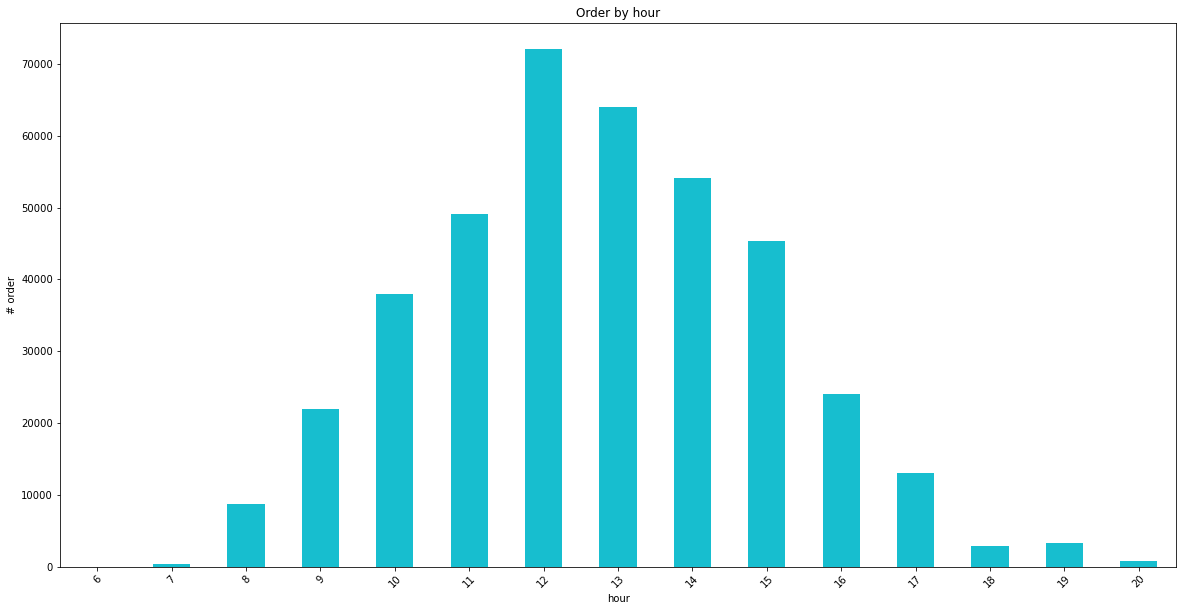

In [18]:
plot_bar(order_by_hour, 'hour', '# order', 'Order by hour')

In [ ]:
# 관찰
# 12시까지 증가세, 13시부터 감소세. 이것만 봐도 간단합니다.   
# 가장 확률을 높이려면, 11:50, 12:50 중에 보내면 됩니다. 
# 아니면, 사용자를 3그룹으로 나눈뒤 보내보는 거죠.  '언제가 가장 효율이 높았는지'

In [20]:
# 아니면 시간대를 잘게 쪼개볼수 있겠죠

# 과연 30분 단위로 쪼개면 어떤 추세를 볼수 있을까?

### 30분 단위로 쪼개어 추세 보기

In [ ]:
# retail.set_index('InvoiceDate').groupby(함수)  # <-- 이번에는 뭔가 함수를 만들어서 지정하겠습니다.

In [21]:
# 12:30 ~ 13:00 => 12:30 으로 반환
# 12:00 ~ 12:30 => 12:00 으로 반환

def half_an_hour(date):   # lamda 로도 만들수 있지만, 편한 로직을 위해 함수로 만들겠습니다.
    minute = ':00'  # 모든 시간은 다 :00 분으로 초기화
    if date.minute > 30:
        minute = ':30'
    hour = str(date.hour)
    if date.hour < 10:     # 0 ~ 9 까지는 앞에 '0' 붙여주기
        hour = '0' + hour
    return hour + minute

In [23]:
from datetime import datetime

In [25]:
datetime.now()

datetime.datetime(2021, 3, 8, 21, 49, 42, 479561)

In [26]:
# 현재 시간으로 동작 확인
half_an_hour(datetime.now())

'21:30'

In [32]:
# 임의의 시간으로 동작 확인
s = '2021-03-26 12:12:12'
s = '2021-03-26 12:33:12'
s = '2021-03-26 9:33:12'   # 시간앞에 0 붙는거 확인하기
dt = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')  # dt 는 datetime 타입
half_an_hour(dt)

'09:30'

In [34]:
# 그룹핑
retail.set_index('InvoiceDate').groupby(half_an_hour).size()

06:00        1
07:30      379
08:00     3145
08:30     5545
09:00     9364
09:30    12580
10:00    16950
10:30    21047
11:00    18925
11:30    30159
12:00    37174
12:30    34891
13:00    31131
13:30    32895
14:00    26958
14:30    27160
15:00    24227
15:30    21142
16:00    14316
16:30     9773
17:00     8889
17:30     4182
18:00     1715
18:30     1213
19:00     1534
19:30     1787
20:00      802
dtype: int64

In [35]:
order_by_hour_half = retail.set_index('InvoiceDate').groupby(half_an_hour).count()['CustomerID']
order_by_hour_half

06:00        1
07:30      379
08:00     3145
08:30     5545
09:00     9364
09:30    12580
10:00    16950
10:30    21047
11:00    18925
11:30    30159
12:00    37174
12:30    34891
13:00    31131
13:30    32895
14:00    26958
14:30    27160
15:00    24227
15:30    21142
16:00    14316
16:30     9773
17:00     8889
17:30     4182
18:00     1715
18:30     1213
19:00     1534
19:30     1787
20:00      802
Name: CustomerID, dtype: int64

In [36]:
# 결과
# 대충 간파가 됩니다.

# 시각화 출력까지 해봅시다

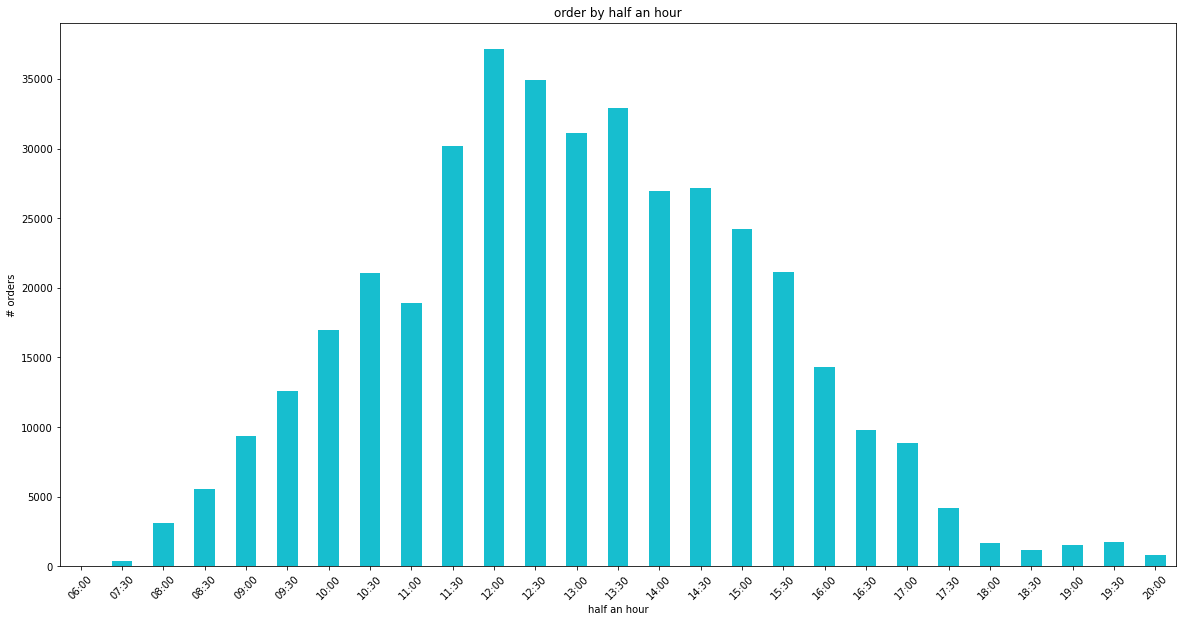

In [37]:
plot_bar(order_by_hour_half, 'half an hour', '# orders', 'order by half an hour')

In [38]:
# 관찰
# 역시나 비슷한 분포를 보입니다.
# 12:00 ~ 12:30 사이가 가장 많은 분포를 보이고 있죠.
# 단순하게는 11:50, 12:20 .. 주문이 많이 일어나기 10분전에 보내보면 되는 겁니다.

# 자, 이것만 봐도, 가장 확률을 높이는 방법을 찾을수 있겠죠.
# 단순히 경험에 의지하는게 아닌, 데이터와 확률에 분석해보면, 의사결정에 도움이 될수 있다

In [39]:
# 그런데!
# 평균치를 내어보면 문제가 생길수 있다.

# 12:00 ~ 12:30 이 가장 많긴 하나.  그 밖의 시간대의 비율이 훨~씬 많습니다.
#  위 두 변량(12:00 ~ 12:30) 이 전체중에선 최댓값이긴 하나
#  합을 기준으로 본다면, 이 둘은 '일부분' 에 불과 합니다.

# 얼마나 되는지 '비율' 을 보도록 하겠습니다

In [41]:
order_by_hour_half.sum()

397884

In [42]:
# sum() 으로 나눠주면 되겠죠.
order_by_hour_half / order_by_hour_half.sum()

06:00    0.000003
07:30    0.000953
08:00    0.007904
08:30    0.013936
09:00    0.023534
09:30    0.031617
10:00    0.042600
10:30    0.052897
11:00    0.047564
11:30    0.075798
12:00    0.093429
12:30    0.087691
13:00    0.078241
13:30    0.082675
14:00    0.067753
14:30    0.068261
15:00    0.060890
15:30    0.053136
16:00    0.035980
16:30    0.024562
17:00    0.022341
17:30    0.010511
18:00    0.004310
18:30    0.003049
19:00    0.003855
19:30    0.004491
20:00    0.002016
Name: CustomerID, dtype: float64

In [44]:
# 결과 관찰
# 12:00, 12:30 은 9%, 8% 입니다.  많이 쳐줘도 18%입니다.
# 나머지 82% 를 버린다?

# 그래서, 여기서 한단계 더 나아간 것이 '개인화된 notification' 입니다

In [45]:
# 개인화 라 해서 무슨 엄청난 테크닉이 들어가는 것은 아닙니다.
# '개일별 맞춤'으로 해보겠다는 뜻입니ㅏㄷ

#### 개인화된 push notification
 - 아마존을 필두로, 개인화(personalization)하여 맞춤으로 사용자마다 최적의 솔루션을 찾는것이 트렌드가 됨
 - 사용자별로 소비의 패턴이 다를 수 있기 때문에, 가장 많이 구매한 시간대를 찾아서 해당 시간대에 쿠폰을 발송!

In [46]:
# 아마존을 필두로 개인화, 맞춤화
# 전체의 평균을 찾는 것이 아니라!  
# 각 개개인 마자 맞춤으로 보여주는 것.

# 아마존 / 유튜브 등..  들어가서 첫 화면은 제가 보는 화면과 여러분이 보는 화면은 다릅니다.
# 내가 과거에 어떤 상품을 보고 어디서 많이 머물렀느냐에 따라 저한테 보여지는 상품들이 달라집니다.
# 각각 사용자마다 개인화 

# 사실 우리가 다루는 이 데이터도 개인화를 해보는게 유리할수 있다.

In [47]:
# 각 사용자별로 주문한ㄴ 시간대를 찾아서 그 시간대에 push 를 보내는 것을 해보겠습니다

#### 사용자별 각 시간별 주문 량 계산하기

In [48]:
# 그룹이 2개로 이루어져야 한다.  사용자 + 시간
retail.set_index('InvoiceDate').groupby(['CustomerID', lambda date: date.hour]).size()

CustomerID    
12346       10     1
12347       8     22
            10    24
            12    47
            13    18
                  ..
18283       15     1
            16    56
            19    87
18287       9      3
            10    67
Length: 11205, dtype: int64

In [49]:
retail.set_index('InvoiceDate').groupby(['CustomerID', lambda date: date.hour]).count()

Unnamed: 0  InvoiceNo  StockCode  Description  Quantity  \
CustomerID                                                               
12346      10           1          1          1            1         1   
12347      8           22         22         22           22        22   
           10          24         24         24           24        24   
           12          47         47         47           47        47   
           13          18         18         18           18        18   
...                   ...        ...        ...          ...       ...   
18283      15           1          1          1            1         1   
           16          56         56         56           56        56   
           19          87         87         87           87        87   
18287      9            3          3          3            3         3   
           10          67         67         67           67        67   

               UnitPrice  Country  CheckoutPrice  
CustomerID                                        
12346      10          1        1              1  
12347      8          22       22             22  
           10         24       24             24  
           12         47       47             47  
           13         18       18             18  
...                  ...      ...            ...  
18283      15          1        1              1  
           16         56       56             56  
           19         87       87             87  
18287      9           3        3              3  
           10         67       67             67  

[11205 rows x 8 columns]

In [51]:
# 아무 컬럼이다 잡아도 됨
order_count_by_hour = retail.set_index('InvoiceDate').groupby(['CustomerID', lambda date: date.hour]).count()['StockCode']
order_count_by_hour

CustomerID    
12346       10     1
12347       8     22
            10    24
            12    47
            13    18
                  ..
18283       15     1
            16    56
            19    87
18287       9      3
            10    67
Name: StockCode, Length: 11205, dtype: int64

In [52]:
# 결과
# 12347 고객은 8시에 22건, 10시에 24건.. 

# 12347 고객을 함 들여다 봅시다

In [53]:
order_count_by_hour.loc[12347]

8     22
10    24
12    47
13    18
14    60
15    11
Name: StockCode, dtype: int64

In [55]:
# 12347 고객은 가장 많은 주문을 한게 14시 임을 알수 있다.

# 아까의 '전체 데이터' 와는 사뭇 다르다는 것을 알수 있다.

# 12347 고객에게는 2시에 보내는 것이 가장 확률을 높이는 방법입니다

#### 사용자별 최대 주문 시간 계산하기
 - 가장 많은 주문량을 보인 시간을 계산

In [56]:
# order_count_by_hour.groupby(사용자별)

order_count_by_hour.groupby('CustomerID').size()

CustomerID
12346    1
12347    6
12348    3
12349    1
12350    1
        ..
18280    1
18281    1
18282    2
18283    8
18287    2
Name: StockCode, Length: 4338, dtype: int64

In [57]:
# 최댓값을 갖는 인덱스를 반환하는 idxmax()
order_count_by_hour.groupby('CustomerID').idxmax()

CustomerID
12346    (12346, 10)
12347    (12347, 14)
12348    (12348, 19)
12349     (12349, 9)
12350    (12350, 16)
            ...     
18280     (18280, 9)
18281    (18281, 10)
18282    (18282, 13)
18283    (18283, 14)
18287    (18287, 10)
Name: StockCode, Length: 4338, dtype: object

In [ ]:
# 12347    최댓값을 갖는 인덱스 >> (12347, 14)

In [59]:
# 위 idmax() 의 결과자체가 인덱스 이기 때문에
# loc() 를 통해서 전달하기만 하변된다

#### 해당 시간 indexing

In [60]:
idx = order_count_by_hour.groupby('CustomerID').idxmax()  # 이 자체가 인덱스다

In [62]:
# 위 인덱스를 loc 에 전달만 해주면 된다.
result = order_count_by_hour.loc[idx]
result

CustomerID    
12346       10      1
12347       14     60
12348       19     17
12349       9      73
12350       16     17
                 ... 
18280       9      10
18281       10      7
18282       13      7
18283       14    201
18287       10     67
Name: StockCode, Length: 4338, dtype: int64

In [ ]:
결과
사용자별로 어떤 시간대에 최대의 구매가 이루어지는지 한눈에 볼수 있다

In [63]:
# 일단 인덱스를 없애고
result.reset_index()

,CustomerID,level_1,StockCode
0,12346,10,1
1,12347,14,60
2,12348,19,17
3,12349,9,73
4,12350,16,17
...,...,...,...
4333,18280,9,10
4334,18281,10,7
4335,18282,13,7
4336,18283,14,201


In [64]:
# 시간으로 그룹핑 하면
result.reset_index().groupby('level_1').groups

{7: [73, 269, 319, 344, 375, 893, 1667, 2317], 8: [46, 58, 87, 126, 172, 179, 187, 260, 278, 279, 282, 292, 306, 347, 399, 429, 496, 503, 526, 533, 549, 552, 651, 671, 747, 755, 784, 792, 800, 803, 806, 821, 838, 877, 883, 920, 944, 947, 951, 954, 1008, 1093, 1106, 1120, 1138, 1172, 1173, 1217, 1251, 1397, 1422, 1424, 1436, 1472, 1512, 1616, 1621, 1666, 1668, 1678, 1687, 1734, 1759, 1761, 1774, 1791, 1815, 1827, 1846, 1859, 1895, 1900, 1903, 1996, 2018, 2023, 2054, 2085, 2108, 2117, 2167, 2172, 2253, 2380, 2383, 2403, 2404, 2417, 2427, 2462, 2464, 2643, 2749, 2776, 2781, 2896, 2936, 2949, 3021, 3130, ...], 9: [3, 9, 26, 30, 33, 35, 37, 48, 60, 66, 75, 84, 86, 90, 100, 106, 107, 121, 127, 135, 138, 142, 144, 146, 154, 159, 181, 199, 230, 240, 264, 265, 267, 277, 280, 286, 294, 298, 328, 333, 336, 342, 343, 352, 362, 366, 385, 402, 421, 459, 470, 475, 478, 482, 483, 509, 517, 519, 574, 603, 615, 630, 636, 642, 644, 691, 701, 706, 707, 746, 749, 752, 764, 770, 781, 783, 818, 825, 829, 844

In [66]:
# 시갇대별로 어떤 사용자가 가장 많은 구매를 주문했는지 확인 가능하다
# 이를 토대로 해당 시간대에 해당 사용자에게 보내면 되는 것이다.
# 이렇게 하면 '전체' 로 본것보다 훨~씬 더 확률을 높일수 있게 된다

In [67]:
# 사실 이렇게 해도 100% 개런티는 힘들죠.
# 이건 다 실험이니까.   그러나 모든 실험에서 확률을 높이려 하는 겁니다.

# 이 방법은 실제로 제가 스타트업을 운영하면서
# 실제로 사용했던 기법은 단순화 해서 설명한거고
# 이와 같이 '개인화' 를 하면 확실히 효과를 볼수 있습니다.

In [68]:
# 다음시간에는 사용자 로그를 분석
# 웹페이지 사용 방문하는 사용자의 
# 서버에 로그가 남습니다.  그 로그를 사용하여
# 어느 페이지에 머물러서 , 얼마나 머룰러서 어디로 이탈하는지 
# 그 이탈하는 고객을 잡기 위한 로그 분석을 진행해보겠습니다.